# Иследовательский анализ данных

### Описание данных в satisfaction_survey.csv

Описание факторов:
- Gender — пол пассажира (бинарный: Female — женский, Male — мужской).
- Customer Type — тип пассажира (категориальный: Loyal customer — лояльный, disloyal Customer — не лояльный).
- Age — возраст пассажира (численный).
- Type of Travel — цель поездки (бинарный: Personal Travel — личная поездка, Business Travel — рабочая поездка).
- Class — класс полёта (категориальный: Business — бизнес-класс, Eco — эконом, Eco Plus — эконом-плюс).
- Flight distance — длина перелёта (численный).
- Inflight wifi service — удовлетворённость сетью Wi-Fi на борту самолёта (численный: 1–5 или 0, если не оценивался).
- Departure/Arrival time convenient — удовлетворённость временем вылета/прилёта (численный: 1–5 или 0, если не оценивался).
- Ease of Online booking — удовлетворённость удобством онлайн-бронирования билетов (численный: 1–5 или 0, если не оценивался).
- Gate location — удовлетворённость расположением выходов на посадку (численный: 1–5 или 0, если не оценивался).
- Food and drink — удовлетворённость питанием на борту (численный: 1–5 или 0, если не оценивался).
- Online boarding — удовлетворённость удобством онлайн-регистрации на рейс (численный: 1–5 или 0, если не оценивался).
- Seat comfort — удовлетворённость удобством мест в самолёте (численный: 1–5 или 0, если не оценивался).
- Inflight entertainment — удовлетворённость уровнем развлечений на борту самолёта (численный: 1–5 или 0, если не оценивался).
- On-board service — удовлетворённость уровнем обслуживания на борту самолёта (численный: 1–5 или 0, если не оценивался).
- Leg room service — удовлетворённость местом для ног перед сиденьем (численный: 1–5 или 0, если не оценивался).
- Baggage handling — удовлетворённость обращением с багажом (численный: 1–5 или 0, если не оценивался).
- Checkin service — удовлетворённость обслуживанием на стойке регистрации (численный: 1–5 или 0, если не оценивался).
- Cleanliness — удовлетворённость чистотой в самолёте (численный: 1–5 или 0, если не оценивался).
- Departure Delay in Minutes — задержка отправления самолёта в минутах (численный: 1–5 или 0, если не оценивался).
- Arrival Delay in Minutes — задержка прибытия самолёта в минутах (численный: 1–5 или 0, если не оценивался).

Предсказываемая характеристика:
- satisfaction — удовлетворённость полётом (бинарный: False — пассажир остался не удовлетворён полётом, True — пассажир остался удовлетворён полётом).

### Загрузка и первичное исследование данных об удовлетворённости полётом

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder
from IPython.display import HTML, display

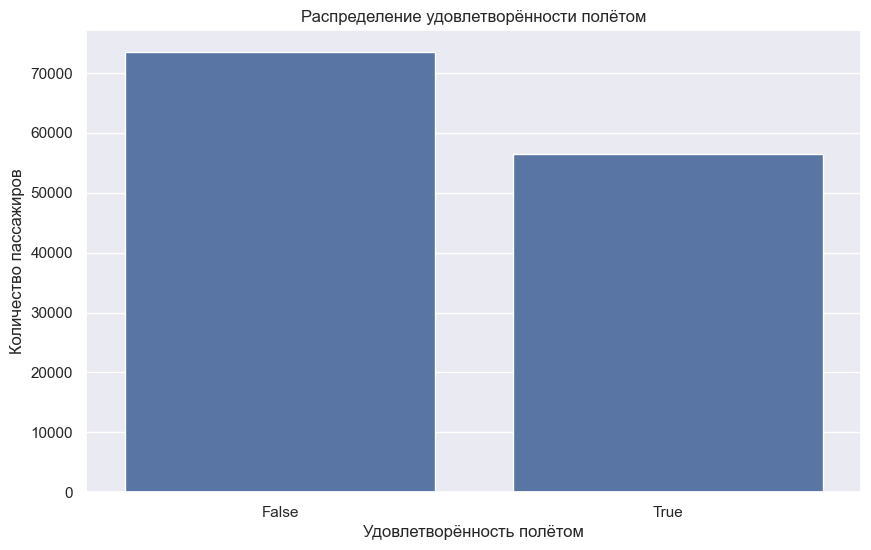

In [2]:
# Загрузка данных
flight_data = pd.read_csv('../../data/satisfaction_survey.csv')
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Разделение факторов от целевой переменной
feature = flight_data.drop(columns='satisfaction')
target = flight_data['satisfaction']

# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(x=target)
plt.title('Распределение удовлетворённости полётом')
plt.xlabel('Удовлетворённость полётом')
plt.ylabel('Количество пассажиров')
plt.show()

Из графика видно, что данные сбалансированы по целевому классу, что обеспечивает корректные условия для обучения модели.

### Формирование обучающей и тестовой выборки

In [3]:
# Разделение данных на обучающую и тестовую выборки (75%:25%)
x_train, x_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.25, random_state=52, stratify=target)

# Соединение данных для анализа
train_data = x_train.copy(deep=True)
train_data['satisfaction'] = y_train

print(f'Размер обучающей выборки: {len(x_train)}')
print(f'Размер тестовой выборки: {len(x_test)}')

Размер обучающей выборки: 97410
Размер тестовой выборки: 32470


### Обработка пропущенных значений

In [4]:
print('Проверка пропущенных значений в данных:')
display(train_data.isna().sum().to_frame(''))

Проверка пропущенных значений в данных:


,
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


В факторе "Arrival Delay in Minutes" есть незначительное количество пропусков. Они будут заменены медианным значением.

In [5]:
arrival_delay_median = train_data['Arrival Delay in Minutes'].median()
train_data['Arrival Delay in Minutes'] = train_data[
    'Arrival Delay in Minutes'].fillna(arrival_delay_median)
x_test['Arrival Delay in Minutes'] = x_test[
    'Arrival Delay in Minutes'].fillna(arrival_delay_median)

omissions = train_data.isna().sum().sum()
print(f'Общее количество пропусков после заполнения данных: {omissions}')

Общее количество пропусков после заполнения данных: 0


### Определение типов факторов

Типы факторов были определены вручную на основе описания данных.

In [6]:
# Численные факторы
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes',
                    'Arrival Delay in Minutes']

# Бинарные категориальные факторы
binary_features = ['Gender', 'Customer Type', 'Type of Travel']

# Многоклассовые категориальные факторы
multiclass_features = ['Class']

# Факторы-оценки (0-5, обрабатываем как категориальные)
rating_features = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Cleanliness']

# Все категориальные факторы
categorical_features = binary_features + multiclass_features + rating_features

### Анализ взаимосвязей между численными факторами и удовлетворённостью

In [7]:
# Анализ корреляционных связей
numeric_data = train_data[numeric_features + ['satisfaction']].copy(deep=True)
correlation_matrix = numeric_data.corr()['satisfaction']

print('Корреляция численных факторов с удовлетворённостью:')
display(correlation_matrix.sort_values(ascending=False).to_frame(''))

# Анализ значимых корреляций
significant_correlations = correlation_matrix[
    (correlation_matrix >= 0.051) | (correlation_matrix <= -0.051)]
print('\nСтатистически значимые корреляции:')
display(significant_correlations.sort_values(ascending=False).to_frame(''))

Корреляция численных факторов с удовлетворённостью:


,
satisfaction,1.000000
Flight Distance,0.298659
Age,0.134240
Departure Delay in Minutes,-0.050080
Arrival Delay in Minutes,-0.056980



Статистически значимые корреляции:


,
satisfaction,1.000000
Flight Distance,0.298659
Age,0.134240
Arrival Delay in Minutes,-0.056980


Здесь видна сильная корреляция признака "Flight Distance" с целевой переменной, что, вероятно, указывает на его высокую прогностическую важность для модели.

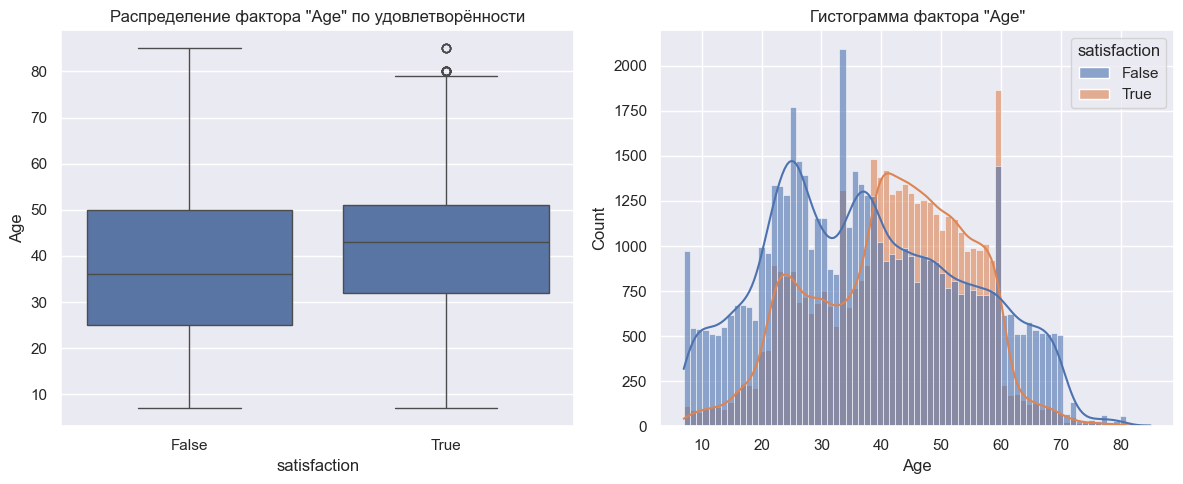

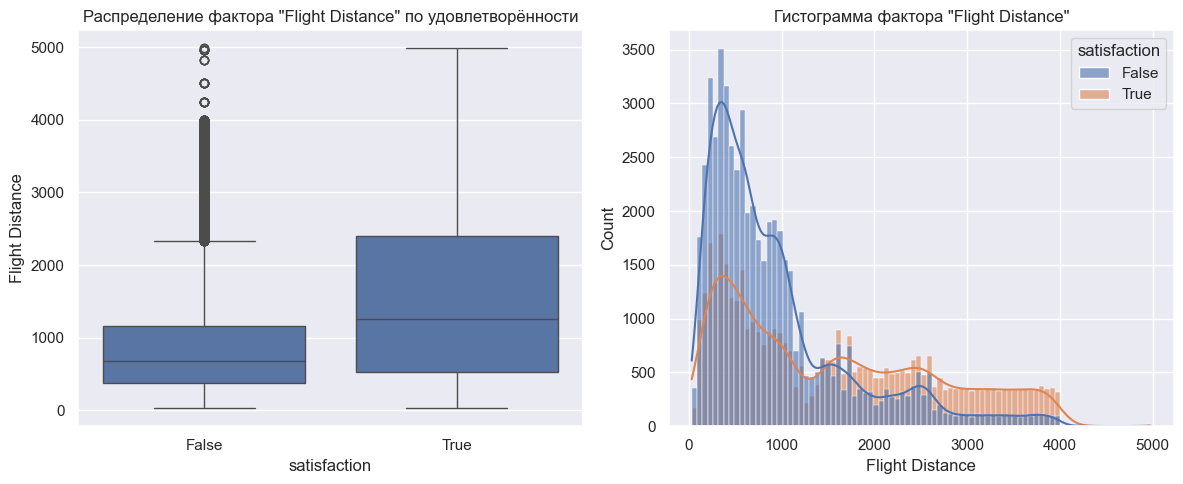

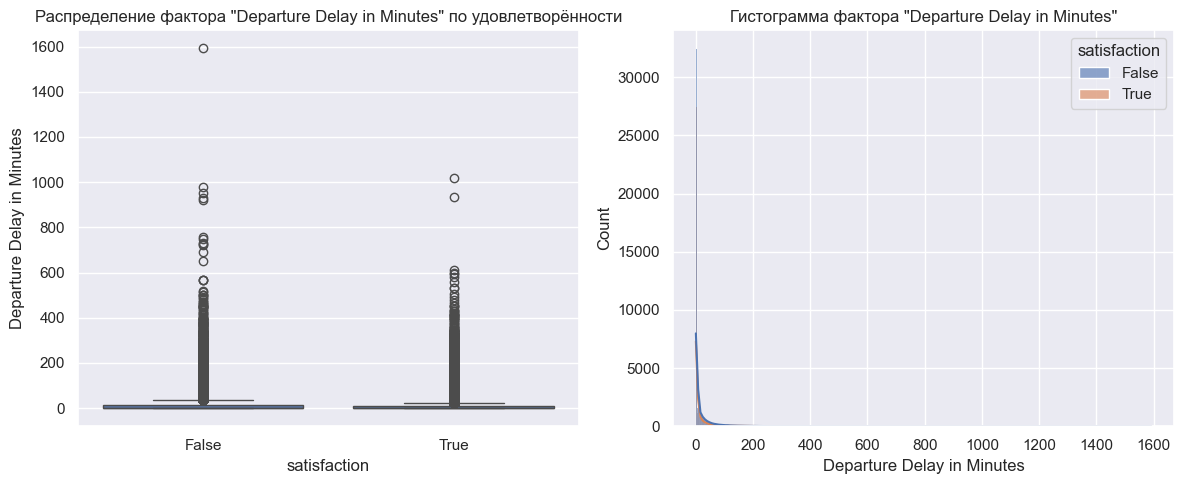

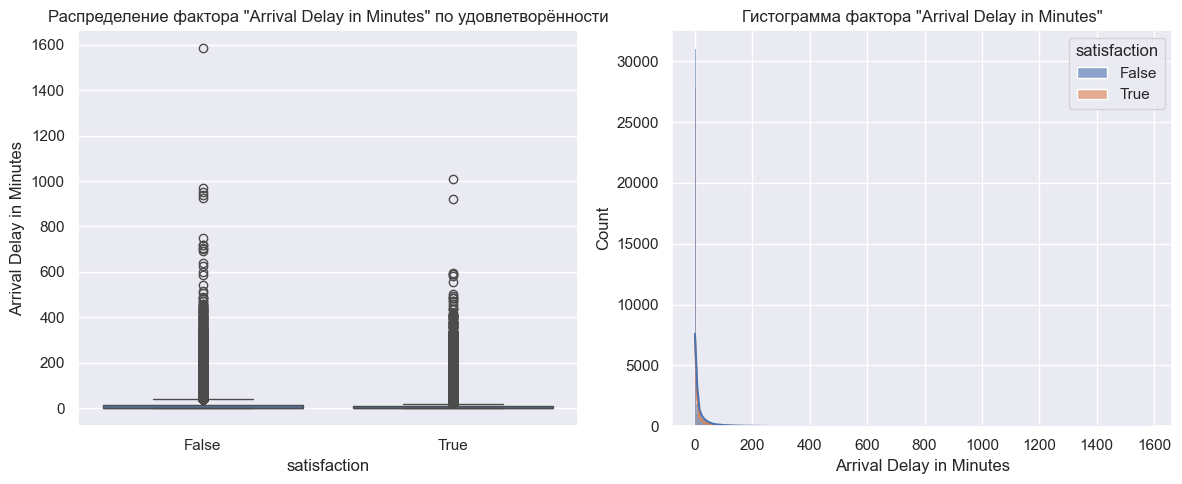

In [8]:
# Визуализация распределений численных факторов
for feature in numeric_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='satisfaction', y=feature, data=train_data)
    plt.title(f'Распределение фактора "{feature}" по удовлетворённости')

    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=feature, hue='satisfaction',
                 kde=True, alpha=0.6)
    plt.title(f'Гистограмма фактора "{feature}"')

    plt.tight_layout()
    plt.show()

Анализ графиков показывает, что пассажиры старшего и среднего возраста обычно более довольными полётом, чем молодые. Также видно, что удовлетворённость растёт с увеличением дальности перелёта, а отсутствие задержек вылета и прибытия напрямую связано с положительными оценками.

### Анализ взаимосвязей между категориальными факторами и удовлетворённостью

In [9]:
def analyze_categorical_influence(data, categorical_cols,
                                  target_col='satisfaction'):
    """Анализирует влияние категориальных признаков на целевую переменную"""
    influence_metrics = []

    for feature in categorical_cols:
        # Агрегирует средние значения целевой переменной по категориям
        aggregated_data = data.groupby(feature, as_index=False).agg({
            target_col: ['mean', 'count']})
        aggregated_data.columns = [feature, 'satisfaction_mean', 'count']

        # Вычисляет метрики влияния
        target_values = aggregated_data['satisfaction_mean'].values
        influence_metrics.append({
            'factor': feature,
            'range': np.max(target_values) - np.min(target_values),
            'min_satisfaction': np.min(target_values),
            'max_satisfaction': np.max(target_values),
            'categories count': len(aggregated_data)
        })

    return pd.DataFrame(influence_metrics)

In [10]:
# Анализ влияния категориальных факторов
categorical_analysis = analyze_categorical_influence(
    train_data, categorical_features)
categorical_analysis = categorical_analysis.sort_values(
    'range', ascending=False)

print('Анализ влияния категориальных факторов на удовлетворённость:')
from IPython.display import HTML
display(HTML(categorical_analysis.to_html(index=False)))

Анализ влияния категориальных факторов на удовлетворённость:


factor,range,min_satisfaction,max_satisfaction,categories count
Online boarding,0.755665,0.115810,0.871474,6
Inflight wifi service,0.750194,0.247393,0.997587,6
Gate location,0.653300,0.346700,1.000000,6
Seat comfort,0.651910,0.000000,0.651910,6
Inflight entertainment,0.651608,0.000000,0.651608,6
On-board service,0.646891,0.000000,0.646891,6
Cleanliness,0.614654,0.000000,0.614654,6
Checkin service,0.612221,0.000000,0.612221,6
Class,0.507482,0.187301,0.694783,3
Type of Travel,0.481757,0.101585,0.583342,2


Анализ важности признаков на основе метрики range выявил, что сервисные факторы — «Online boarding» и «Inflight wifi service» — обладают наибольшим влиянием на целевую переменную. В то же время, фактор «Gender» и факторы «Departure/Arrival time convenient» демонстрируют незначительную прогностическую силу и, вероятно, вносят минимальный вклад в прогноз модели.

In [11]:
# Автоматический отбор наиболее значимых категориальных 
significant_categorical_features = categorical_analysis[
    categorical_analysis['range'] > 0.2
]['factor'].tolist()

print('Значимые категориальные факторы:')
display(significant_categorical_features)

Значимые категориальные факторы:


['Online boarding',
 'Inflight wifi service',
 'Gate location',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Cleanliness',
 'Checkin service',
 'Class',
 'Type of Travel',
 'Ease of Online booking',
 'Leg room service',
 'Baggage handling',
 'Food and drink',
 'Customer Type']

In [12]:
# Детальный анализ значимых факторов
for feature in significant_categorical_features:
    print(f'\nДетальный анализ для фактора "{feature}":')
    analysis_table = train_data.groupby(
        [feature, 'satisfaction'], as_index=False).agg(
            {'Age': 'count'}).pivot(
                index=feature, columns='satisfaction', values='Age')
    analysis_table['satisfaction_rate'] = (
        analysis_table[True] / (analysis_table[True] + analysis_table[False]))
    display(analysis_table)


Детальный анализ для фактора "Online boarding":


satisfaction,False,True,satisfaction_rate
Online boarding,,,
0,1019,1284,0.557534
1,8632,1335,0.133942
2,14552,1906,0.115810
3,17470,2823,0.139112
4,10896,17886,0.621430
5,2520,17087,0.871474



Детальный анализ для фактора "Inflight wifi service":


satisfaction,False,True,satisfaction_rate
Inflight wifi service,,,
0,7,2894,0.997587
1,11329,5548,0.328731
2,18259,6002,0.247393
3,17913,6083,0.253501
4,7467,11132,0.598527
5,114,10662,0.989421



Детальный анализ для фактора "Gate location":


satisfaction,False,True,satisfaction_rate
Gate location,,,
0,NaN,1.0,NaN
1,8263.0,8247.0,0.499515
2,9724.0,8509.0,0.466681
3,17498.0,9286.0,0.346700
4,13958.0,8865.0,0.388424
5,5646.0,7413.0,0.567654



Детальный анализ для фактора "Seat comfort":


satisfaction,False,True,satisfaction_rate
Seat comfort,,,
0,1.0,NaN,NaN
1,8834.0,2537.0,0.223111
2,10766.0,3127.0,0.225077
3,13747.0,3746.0,0.214143
4,13092.0,16713.0,0.560745
5,8649.0,16198.0,0.651910



Детальный анализ для фактора "Inflight entertainment":


satisfaction,False,True,satisfaction_rate
Inflight entertainment,,,
0,13.0,NaN,NaN
1,10129.0,1662.0,0.140955
2,13016.0,3498.0,0.211820
3,12918.0,4870.0,0.273780
4,10769.0,16872.0,0.610398
5,8244.0,15419.0,0.651608



Детальный анализ для фактора "On-board service":


satisfaction,False,True,satisfaction_rate
On-board service,,,
0,3.0,NaN,NaN
1,8950.0,2197.0,0.197093
2,10255.0,3500.0,0.254453
3,14562.0,6803.0,0.318418
4,13516.0,15526.0,0.534605
5,7803.0,14295.0,0.646891



Детальный анализ для фактора "Cleanliness":


satisfaction,False,True,satisfaction_rate
Cleanliness,,,
0,11.0,NaN,NaN
1,10150.0,2459.0,0.195019
2,11883.0,3180.0,0.211113
3,12972.0,9945.0,0.433957
4,11842.0,13608.0,0.534695
5,8231.0,13129.0,0.614654



Детальный анализ для фактора "Checkin service":


satisfaction,False,True,satisfaction_rate
Checkin service,,,
0,1.0,NaN,NaN
1,9158.0,2888.0,0.239748
2,9084.0,3028.0,0.250000
3,14605.0,11977.0,0.450568
4,14727.0,12565.0,0.460391
5,7514.0,11863.0,0.612221



Детальный анализ для фактора "Class":


satisfaction,False,True,satisfaction_rate
Class,,,
Business,14246,32429,0.694783
Eco,35506,8183,0.187301
Eco Plus,5337,1709,0.242549



Детальный анализ для фактора "Type of Travel":


satisfaction,False,True,satisfaction_rate
Type of Travel,,,
Business travel,28044,39263,0.583342
Personal Travel,27045,3058,0.101585



Детальный анализ для фактора "Ease of Online booking":


satisfaction,False,True,satisfaction_rate
Ease of Online booking,,,
0,1438,2811,0.661567
1,10244,6269,0.379640
2,15580,6867,0.305921
3,15689,7042,0.309797
4,8648,9746,0.529847
5,3490,9586,0.733099



Детальный анализ для фактора "Leg room service":


satisfaction,False,True,satisfaction_rate
Leg room service,,,
0,299,152,0.337029
1,7702,1988,0.205160
2,13356,5102,0.276411
3,13604,5159,0.274956
4,11211,15674,0.583002
5,8917,14246,0.615033



Детальный анализ для фактора "Baggage handling":


satisfaction,False,True,satisfaction_rate
Baggage handling,,,
1,4756,2070,0.303252
2,7625,3165,0.293327
3,14762,4562,0.236079
4,18257,16901,0.480716
5,9689,15623,0.617217



Детальный анализ для фактора "Food and drink":


satisfaction,False,True,satisfaction_rate
Food and drink,,,
0,54,46,0.460000
1,9692,2359,0.195751
2,12617,7948,0.386482
3,12500,8325,0.399760
4,10874,12075,0.526167
5,9352,11568,0.552964



Детальный анализ для фактора "Customer Type":


satisfaction,False,True,satisfaction_rate
Customer Type,,,
Loyal Customer,41500,38089,0.478571
disloyal Customer,13589,4232,0.237473


Анализ таблиц показывает четкую зависимость: для самых влиятельных факторов, таких как "Online boarding" и "Inflight wifi service", уровень удовлетворенности кардинально меняется в зависимости от оценки услуги. Например, при высшей оценке 5 за онлайн-регистрацию доля довольных пассажиров составляет 87%, тогда как при оценке 2 — лишь 11.6%. Аналогично, для Wi-Fi максимальный уровень удовлетворенности (99.7%) наблюдается при оценке 0 и 5. Такие категориальные факторы, как "Class" и "Type of Travel", также демонстрируют сильную связь: пассажиры бизнес-класса и пассажиры с деловой целью поездки значительно более удовлетворены. Это подтверждает, что данные категориальные переменные являются высокоинформативными для модели.

### Анализ взаимосвязей между категориальными факторами

In [13]:
# Анализ взаимосвязи между услугами
print('Анализ вероятных взаимосвязей между категориальными факторами:')
service_features = ['Inflight wifi service', 'Food and drink',
                    'Seat comfort', 'Inflight entertainment']
for i in range(len(service_features)):
    for j in range(i+1, len(service_features)):
        col_x = service_features[i]
        col_y = service_features[j]

        print(f'\nВзаимосвязь между факторами "{col_x}" и "{col_y}":')
        cross_table = train_data.groupby([col_x, col_y], as_index=False).agg({
            'satisfaction': 'count'}).pivot(
                index=col_x, columns=col_y, values='satisfaction')
        display(cross_table.fillna(0).astype(int))

Анализ вероятных взаимосвязей между категориальными факторами:

Взаимосвязь между факторами "Inflight wifi service" и "Food and drink":


Food and drink,0,1,2,3,4,5
Inflight wifi service,,,,,,
0,49,313,617,673,624,625
1,24,3480,3144,3146,3591,3492
2,14,2950,7311,4517,4836,4633
3,7,2751,4376,7338,4857,4667
4,2,1796,3288,3264,6641,3608
5,4,761,1829,1887,2400,3895



Взаимосвязь между факторами "Inflight wifi service" и "Seat comfort":


Seat comfort,0,1,2,3,4,5
Inflight wifi service,,,,,,
0,0,342,370,448,856,885
1,0,3014,1979,2663,4967,4254
2,0,2768,5377,4247,6574,5295
3,0,2682,3133,6328,6539,5314
4,1,1725,2089,2780,7490,4514
5,0,840,945,1027,3379,4585



Взаимосвязь между факторами "Inflight wifi service" и "Inflight entertainment":


Inflight entertainment,0,1,2,3,4,5
Inflight wifi service,,,,,,
0,7,459,579,633,604,619
1,0,4070,2113,2376,4393,3925
2,3,2669,7632,3512,5429,5016
3,2,2548,3179,7682,5559,5026
4,1,1481,2108,2496,8387,4126
5,0,564,903,1089,3269,4951



Взаимосвязь между факторами "Food and drink" и "Seat comfort":


Seat comfort,0,1,2,3,4,5
Food and drink,,,,,,
0,0,22,21,24,19,14
1,1,7986,847,1455,1221,541
2,0,916,9941,1847,4296,3565
3,0,892,1183,10756,4424,3570
4,0,841,1025,1794,15522,3767
5,0,714,876,1617,4323,13390



Взаимосвязь между факторами "Food and drink" и "Inflight entertainment":


Inflight entertainment,0,1,2,3,4,5
Food and drink,,,,,,
0,10,13,11,21,29,16
1,1,8791,726,846,973,714
2,1,780,12001,1491,3520,2772
3,0,833,1322,12458,3374,2838
4,1,722,1258,1532,16462,2974
5,0,652,1196,1440,3283,14349



Взаимосвязь между факторами "Seat comfort" и "Inflight entertainment":


Inflight entertainment,0,1,2,3,4,5
Seat comfort,,,,,,
0,0,0,0,0,1,0
1,0,7655,723,831,1138,1024
2,4,680,9635,1161,1361,1052
3,4,1203,2083,10812,2050,1341
4,5,1487,2657,2962,17095,5599
5,0,766,1416,2022,5996,14647


Анализ таблиц выявляет наличие устойчивых взаимосвязей между ключевыми сервисными факторами. Наблюдается четкая положительная корреляция: пассажиры, высоко оценившие один сервис (например, Wi-Fi или питание), как правило, так же высоко оценивают и другие смежные услуги (комфорт сидений, развлечения). Это указывает на формирование общего впечатления от полета, где оценка не сводится к одному изолированному фактору. Кроме того, распределения оценок по категориям для связанных факторов очень похожи, что говорит о их потенциальной коллинеарности.

In [14]:
# Анализ взаимосвязи типа путешествия и класса
print('\nВзаимосвязь "Type of Travel" и "Class":')
travel_class_table = train_data.groupby(
    ['Type of Travel', 'Class'], as_index=False).agg(
        {'satisfaction': ['count', 'mean']})
display(travel_class_table)


Взаимосвязь "Type of Travel" и "Class":


Type of Travel     Class satisfaction          
                                    count      mean
0  Business travel  Business        44669  0.720679
1  Business travel       Eco        18977  0.298150
2  Business travel  Eco Plus         3661  0.385960
3  Personal Travel  Business         2006  0.118146
4  Personal Travel       Eco        24712  0.102177
5  Personal Travel  Eco Plus         3385  0.087445

Тип путешествия и класс обслуживания имеют сильную взаимосвязь с уровнем удовлетворенности.  Пассажиры с деловой целью поездки, особенно летающие бизнес-классом, демонстрируют значительно более высокую удовлетворенность (72%), в то время как пассажиры с личными целями поездки, летящие в эконом-классе, имеют крайне низкие оценки (около 10%).

### Отбор финального набора факторов

In [15]:
# Исключаем незначащие или сильно скоррелированные с другими факторы
excluded_features = ['Arrival Delay in Minutes', 'Gate location',
                     'Baggage handling']

# Итоговый набор факторов
final_numeric_features = [f for f in numeric_features
                          if f not in excluded_features]
final_categorical_features = [f for f in significant_categorical_features
                              if f not in excluded_features]

# Разделяем итоговые категориальные факторы по типам
final_binary_features = [f for f in final_categorical_features
                         if f in binary_features]
final_multiclass_features = [f for f in final_categorical_features
                             if f in multiclass_features]
final_rating_features = [f for f in final_categorical_features
                         if f in rating_features]

print('Итоговый набор численных факторов:')
print(final_numeric_features)

print('\nИтоговый набор бинарных факторов:')
print(final_binary_features)

print('\nИтоговый набор многоклассовых факторов:')
print(final_multiclass_features)

print('\nИтоговый набор факторов-оценок:')
display(final_rating_features)

Итоговый набор численных факторов:
['Age', 'Flight Distance', 'Departure Delay in Minutes']

Итоговый набор бинарных факторов:
['Type of Travel', 'Customer Type']

Итоговый набор многоклассовых факторов:
['Class']

Итоговый набор факторов-оценок:


['Online boarding',
 'Inflight wifi service',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Cleanliness',
 'Checkin service',
 'Ease of Online booking',
 'Leg room service',
 'Food and drink']

### Подготовка данных для моделирования

In [16]:
# Подготовка обучающей выборки
x_train_processed = x_train[
    final_numeric_features + final_categorical_features].copy(deep=True)
x_test_processed = x_test[
    final_numeric_features + final_categorical_features].copy(deep=True)

# Бинарное кодирование для всех категориальных факторов
binary_encoders = {}

# Кодирование бинарных факторов
for feature in final_binary_features:
    encoder = BinaryEncoder()
    encoded_train = encoder.fit_transform(x_train_processed[feature])
    encoded_test = encoder.transform(x_test_processed[feature])

    # Добавление закодированных колонок
    for col in encoded_train.columns:
        x_train_processed[col] = encoded_train[col]
        x_test_processed[col] = encoded_test[col]

    # Удаление исходной колонки
    x_train_processed.drop(columns=[feature], inplace=True)
    x_test_processed.drop(columns=[feature], inplace=True)

    binary_encoders[feature] = encoder

# Кодирование многоклассовых факторов
for feature in final_multiclass_features:
    encoder = BinaryEncoder()
    encoded_train = encoder.fit_transform(x_train_processed[feature])
    encoded_test = encoder.transform(x_test_processed[feature])

    # Добавление закодированных колонок
    for col in encoded_train.columns:
        x_train_processed[col] = encoded_train[col]
        x_test_processed[col] = encoded_test[col]

    # Удаление исходной колонки
    x_train_processed.drop(columns=[feature], inplace=True)
    x_test_processed.drop(columns=[feature], inplace=True)

    binary_encoders[feature] = encoder

# Кодирование факторов-оценок (0-5) как категориальных
for feature in final_rating_features:
    # Преобразование в строковый тип для корректного бинарного кодирования
    x_train_processed[feature] = x_train_processed[feature].astype(str)
    x_test_processed[feature] = x_test_processed[feature].astype(str)

    encoder = BinaryEncoder()
    encoded_train = encoder.fit_transform(x_train_processed[feature])
    encoded_test = encoder.transform(x_test_processed[feature])

    # Добавление закодированных колонок
    for col in encoded_train.columns:
        x_train_processed[col] = encoded_train[col]
        x_test_processed[col] = encoded_test[col]

    # Удаление исходной колонки
    x_train_processed.drop(columns=[feature], inplace=True)
    x_test_processed.drop(columns=[feature], inplace=True)

    binary_encoders[feature] = encoder

# Определение колонок для масштабирования (только численные признаки)
numeric_cols = final_numeric_features
categorical_cols = [col for col in x_train_processed.columns
                   if col not in numeric_cols]

# Масштабирование только численных факторов
scaler = StandardScaler()
x_train_numeric_scaled = scaler.fit_transform(x_train_processed[numeric_cols])
x_test_numeric_scaled = scaler.transform(x_test_processed[numeric_cols])

# Создание финальных DataFrame с масштабированными численными и исходными
# категориальными признаками
x_train_final = pd.DataFrame(
    x_train_numeric_scaled,
    columns=numeric_cols,
    index=x_train_processed.index
)

x_test_final = pd.DataFrame(
    x_test_numeric_scaled,
    columns=numeric_cols,
    index=x_test_processed.index
)

# Добавление категориальных признаков без изменений
for col in categorical_cols:
    x_train_final[col] = x_train_processed[col].values
    x_test_final[col] = x_test_processed[col].values

### Вывод подготовленных данных

In [17]:
print('Закодированные данные для обучения (первые 5 строк):')
display(x_train_processed.head())

print('\nМасштабированные данные для обучения (первые 5 строк):')
display(x_train_final.head())

Закодированные данные для обучения (первые 5 строк):


,Age,Flight Distance,Departure Delay in Minutes,Type of Travel_0,Type of Travel_1,Customer Type_0,Customer Type_1,Class_0,Class_1,Online boarding_0,...,Checkin service_2,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Leg room service_0,Leg room service_1,Leg room service_2,Food and drink_0,Food and drink_1,Food and drink_2
127781,53,1440,0,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
124940,8,476,1,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
82668,26,484,9,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,1
13890,35,2381,11,0,1,0,1,1,1,0,...,1,0,1,1,0,1,1,0,1,0
58120,27,409,0,1,0,0,1,1,1,0,...,1,0,0,1,1,0,0,0,1,1



Масштабированные данные для обучения (первые 5 строк):


,Age,Flight Distance,Departure Delay in Minutes,Type of Travel_0,Type of Travel_1,Customer Type_0,Customer Type_1,Class_0,Class_1,Online boarding_0,...,Checkin service_2,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Leg room service_0,Leg room service_1,Leg room service_2,Food and drink_0,Food and drink_1,Food and drink_2
127781,0.898634,0.248660,-0.389023,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
124940,-2.081556,-0.717913,-0.362395,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
82668,-0.889480,-0.709892,-0.149370,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,1
13890,-0.293442,1.192171,-0.096114,0,1,0,1,1,1,0,...,1,0,1,1,0,1,1,0,1,0
58120,-0.823254,-0.785092,-0.389023,1,0,0,1,1,1,0,...,1,0,0,1,1,0,0,0,1,1


In [18]:
print('Закодированные данные для тестирования (первые 5 строк):')
display(x_test_processed.head())

print('\nМасштабированные данные для тестирования (первые 5 строк):')
display(x_test_final.head())

Закодированные данные для тестирования (первые 5 строк):


,Age,Flight Distance,Departure Delay in Minutes,Type of Travel_0,Type of Travel_1,Customer Type_0,Customer Type_1,Class_0,Class_1,Online boarding_0,...,Checkin service_2,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Leg room service_0,Leg room service_1,Leg room service_2,Food and drink_0,Food and drink_1,Food and drink_2
95435,14,489,76,1,0,0,1,1,0,0,...,1,1,0,0,0,0,1,0,0,1
69214,57,757,2,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,1
111885,24,1024,22,0,1,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
84992,56,407,0,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
20174,11,930,21,0,1,1,0,1,0,1,...,1,0,1,1,0,1,0,0,1,1



Масштабированные данные для тестирования (первые 5 строк):


,Age,Flight Distance,Departure Delay in Minutes,Type of Travel_0,Type of Travel_1,Customer Type_0,Customer Type_1,Class_0,Class_1,Online boarding_0,...,Checkin service_2,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Leg room service_0,Leg room service_1,Leg room service_2,Food and drink_0,Food and drink_1,Food and drink_2
95435,-1.684197,-0.704879,1.634711,1,0,0,1,1,0,0,...,1,1,0,0,0,0,1,0,0,1
69214,1.163540,-0.436163,-0.335767,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,1
111885,-1.021933,-0.168451,0.196795,0,1,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
84992,1.097313,-0.787097,-0.389023,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
20174,-1.882877,-0.262702,0.170167,0,1,1,0,1,0,1,...,1,0,1,1,0,1,0,0,1,1


# Создание и обучение модели

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

### Подготовка данных

In [20]:
# Чтение данных
x_train = x_train_final
y_train = y_train
x_test = x_test_final
y_test = y_test

# Разделение обучающей выборки на обучающую и валидационную (75%:25%)
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=52, stratify=y_train)

# Преобразование из 2D массива в 1D для корректности
y_train_split = y_train_split.values.ravel()
y_val = y_val.values.ravel()

print(f'Размер обучающей выборки: {x_train_split.shape}')
print(f'Размер валидационной выборки: {x_val.shape}')

Размер обучающей выборки: (73057, 39)
Размер валидационной выборки: (24353, 39)


### Создание и обучение модели

In [21]:
# Создание и обучение модели
model = LogisticRegression(penalty=None)
model.fit(x_train_split, y_train_split)

# Предсказания
train_predictions = model.predict(x_train_split)
train_probabilities = model.predict_proba(x_train_split)

# Промежуточные проверки
print('Предсказания модели:')

print('\nПервые 10 предсказанных классов:')
print(train_predictions[:10])

print('\nПервые 10 предсказанных вероятностей:')
print(train_probabilities[:10])

Предсказания модели:

Первые 10 предсказанных классов:
[ True  True  True False  True False  True  True  True  True]

Первые 10 предсказанных вероятностей:
[[0.06234532 0.93765468]
 [0.02215817 0.97784183]
 [0.03464377 0.96535623]
 [0.85811016 0.14188984]
 [0.03453076 0.96546924]
 [0.99263811 0.00736189]
 [0.12998877 0.87001123]
 [0.03421402 0.96578598]
 [0.0282317  0.9717683 ]
 [0.07102637 0.92897363]]


### Оценка качества модели на обучающей и валидационной выборках

In [22]:
# Метрики качества на обучающей выборке
train_accuracy = accuracy_score(y_train_split, train_predictions)
train_precision = precision_score(y_train_split, train_predictions,
                                  zero_division=0)
train_recall = recall_score(y_train_split, train_predictions, zero_division=0)
train_f1 = f1_score(y_train_split, train_predictions, zero_division=0)

print('Метрики качества на обучающей выборке:')
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1-score: {train_f1}')

# Метрики качества на валидационной выборке
val_predictions = model.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions, zero_division=0)
val_recall = recall_score(y_val, val_predictions, zero_division=0)
val_f1 = f1_score(y_val, val_predictions, zero_division=0)

print('\nМетрики качества на валидационной выборке:')
print(f'Accuracy: {val_accuracy}')
print(f'Precision: {val_precision}')
print(f'Recall: {val_recall}')
print(f'F1-score: {val_f1}')

Метрики качества на обучающей выборке:
Accuracy: 0.8937678798746185
Precision: 0.8941226743803826
Recall: 0.8569673293216975
F1-score: 0.8751508131846919

Метрики качества на валидационной выборке:
Accuracy: 0.8930727220465651
Precision: 0.891287284144427
Recall: 0.858601134215501
F1-score: 0.8746389370306181


Модель демонстрирует хорошую предсказательную способность. Но нам не нужно предсказывать удовлетворенность полетом, потому что она уже известна. Конечная цель — идентифицировать факторы, вносящие наибольший вклад в итоговый прогноз, для чего необходимо интепретировать коэффициенты модели.

### Подбор оптимального порогового значения

In [23]:
best_threshold = None
best_f1 = -float('inf')

val_probabilities = model.predict_proba(x_val)[:, 1]

for t in range(0, 1001):
    threshold = 0.001 * t
    y_val_pred = val_probabilities > threshold
    f1 = f1_score(y_val, y_val_pred, zero_division=0)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Лучшее значение F1-score на валидационной выборке: {best_f1}')
print(f'Оптимальный порог: {best_threshold}')

Лучшее значение F1-score на валидационной выборке: 0.8760102690881431
Оптимальный порог: 0.463


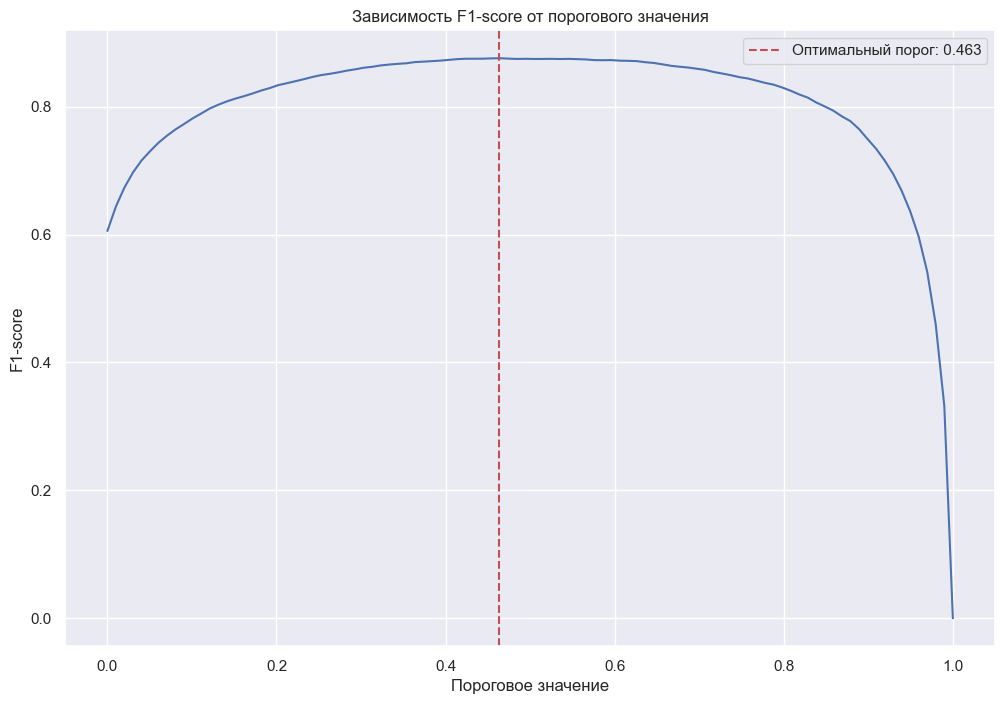

In [24]:
# Визуализация зависимости F1-score от порога
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for threshold in thresholds:
    y_val_pred = val_probabilities > threshold
    f1_scores.append(f1_score(y_val, y_val_pred, zero_division=0))

sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores)
plt.axvline(x=best_threshold, color='r', linestyle='--',
            label=f'Оптимальный порог: {best_threshold}')
plt.xlabel('Пороговое значение')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от порогового значения')
plt.legend()
plt.grid(True)
plt.show()

Для повышения качества прогнозов модели был подобран новый порог классификации вместо стандартного значения 0.5.

### Оценка качества модели на тестовой выборке

In [25]:
# Предсказания с оптимальным порогом
test_probabilities = model.predict_proba(x_test)[:, 1]
test_predictions_optimal = test_probabilities > best_threshold

# Метрики качества на тестовой выборке
test_accuracy = accuracy_score(y_test, test_predictions_optimal)
test_precision = precision_score(y_test, test_predictions_optimal,
                                 zero_division=0)
test_recall = recall_score(y_test, test_predictions_optimal, zero_division=0)
test_f1 = f1_score(y_test, test_predictions_optimal, zero_division=0)

print('Метрики качества на тестовой выборке (с оптимальным порогом):')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1-score: {test_f1}')

Метрики качества на тестовой выборке (с оптимальным порогом):
Accuracy: 0.892085001539883
Precision: 0.8835274542429284
Recall: 0.8657404125611399
F1-score: 0.8745435016111708


Схожие значения метрик качества на обучающей, валидационной и тестовой выборках свидетельствуют об отсутствии переобучения и о том, что модель достигла максимальной эффективности на имеющихся данных. Так же видно, что подбор оптимального порогового значения не улучшил качество предсказаний модели.

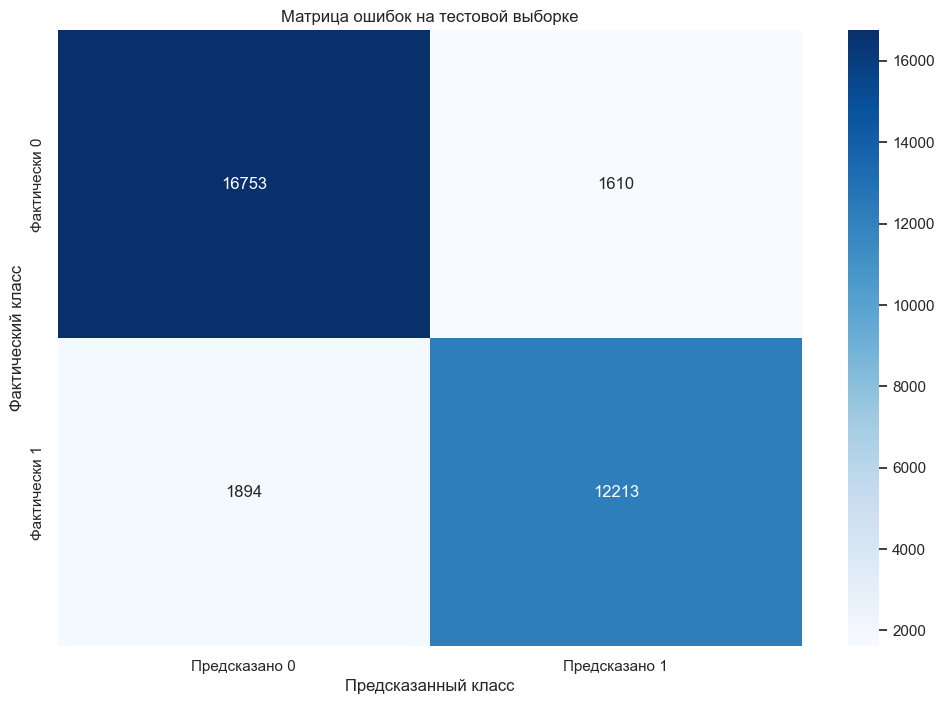

In [26]:
# Матрица ошибок
cm = confusion_matrix(y_test, test_predictions_optimal)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.title('Матрица ошибок на тестовой выборке')
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

In [27]:
# Полный отчет о классификации
print('Отчёт о классификации:')
report = classification_report(y_test, test_predictions_optimal,
                               zero_division=0, output_dict=True)
display(pd.DataFrame(report).transpose())

Отчёт о классификации:


,precision,recall,f1-score,support
False,0.898429,0.912324,0.905323,18363.000000
True,0.883527,0.865740,0.874544,14107.000000
accuracy,0.892085,0.892085,0.892085,0.892085
macro avg,0.890978,0.889032,0.889933,32470.000000
weighted avg,0.891955,0.892085,0.891950,32470.000000


Модель демонстрирует сбалансированную и высокую эффективность в прогнозировании обоих классов, о чем свидетельствуют значения метрик precision и recall выше 0.86. Общая точность (accuracy) модели составляет 89.2%, что указывает на ее надежность для решения поставленной задачи.

### Бутстрап для доверительных интервалов метрик

In [28]:
# Объединение тестовых данных
x_y_test = x_test.copy(deep=True)
x_y_test['satisfaction'] = y_test.values

boot_accuracies = []
boot_precisions = []
boot_recalls = []
boot_f1_scores = []

n_bootstraps = 1000

print(f'Выполняется бутстрап ({n_bootstraps} итераций)...')
for i in range(n_bootstraps):
    if (i + 1) % 100 == 0:
        print(f'Завершено итераций: {i + 1}/{n_bootstraps}')

    # Создание бутстрап-выборки
    x_y_test_boot = x_y_test.sample(len(x_y_test), replace=True)
    x_test_boot = x_y_test_boot.drop(columns='satisfaction')
    y_test_boot = x_y_test_boot['satisfaction']

    # Предсказания модели с оптимальным порогом
    predicted_probas = model.predict_proba(x_test_boot)
    y_pred = predicted_probas[:, 1] >= best_threshold

    # Вычисление метрик качества
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred,
                                           zero_division=0))
    boot_recalls.append(recall_score(y_test_boot, y_pred, zero_division=0))
    boot_f1_scores.append(f1_score(y_test_boot, y_pred, zero_division=0))

def calculate_confidence_interval(metric_values):
    """Вычисляет доверительные интервалы (95%)"""
    sorted_metrics = np.sort(metric_values)
    lower_bound = sorted_metrics[int(0.025 * len(sorted_metrics))]
    upper_bound = sorted_metrics[int(0.975 * len(sorted_metrics))]
    return lower_bound, upper_bound

accuracy_ci = calculate_confidence_interval(boot_accuracies)
precision_ci = calculate_confidence_interval(boot_precisions)
recall_ci = calculate_confidence_interval(boot_recalls)
f1_ci = calculate_confidence_interval(boot_f1_scores)

Выполняется бутстрап (1000 итераций)...
Завершено итераций: 100/1000
Завершено итераций: 200/1000
Завершено итераций: 300/1000
Завершено итераций: 400/1000
Завершено итераций: 500/1000
Завершено итераций: 600/1000
Завершено итераций: 700/1000
Завершено итераций: 800/1000
Завершено итераций: 900/1000
Завершено итераций: 1000/1000


In [29]:
# Вывод доверительных интервалов
print('Доверительные интервалы метрик (бутстрап):')
print('Accuracy:')
print(f'Среднее значение интервала: {test_accuracy}')
print(f'Интервал: [{accuracy_ci[0]}, {accuracy_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {
    accuracy_ci[1] - accuracy_ci[0]})')

print('\nPrecision:')
print(f'Среднее значение интервала: {test_precision}')
print(f'Интервал: [{precision_ci[0]}, {precision_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {
    precision_ci[1] - precision_ci[0]})')

print('\nRecall:')
print(f'Среднее значение интервала: {test_recall}')
print(f'Интервал: [{recall_ci[0]}, {recall_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {
    recall_ci[1] - recall_ci[0]})')

print('\nF1:')
print(f'Среднее значение интервала: {test_f1}')
print(f'Интервал: [{f1_ci[0]}, {f1_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {f1_ci[1] - f1_ci[0]})')

Доверительные интервалы метрик (бутстрап):
Accuracy:
Среднее значение интервала: 0.892085001539883
Интервал: [0.8888512473052048, 0.8952263627964274]
Описание интервала: (95% ДИ, ширина: 0.006375115491222605)

Precision:
Среднее значение интервала: 0.8835274542429284
Интервал: [0.8779171528588098, 0.8885271990740741]
Описание интервала: (95% ДИ, ширина: 0.01061004621526429)

Recall:
Среднее значение интервала: 0.8657404125611399
Интервал: [0.8600438689591736, 0.8712523310859274]
Описание интервала: (95% ДИ, ширина: 0.011208462126753749)

F1:
Среднее значение интервала: 0.8745435016111708
Интервал: [0.8704796652001288, 0.8783148526931496]
Описание интервала: (95% ДИ, ширина: 0.007835187493020812)


Доверительные интервалы бутстрапа очень узкие, что свидетельствует о хорошей предсказательной способности модели. В лучшем и в худшем случае модель работает практически идентично.

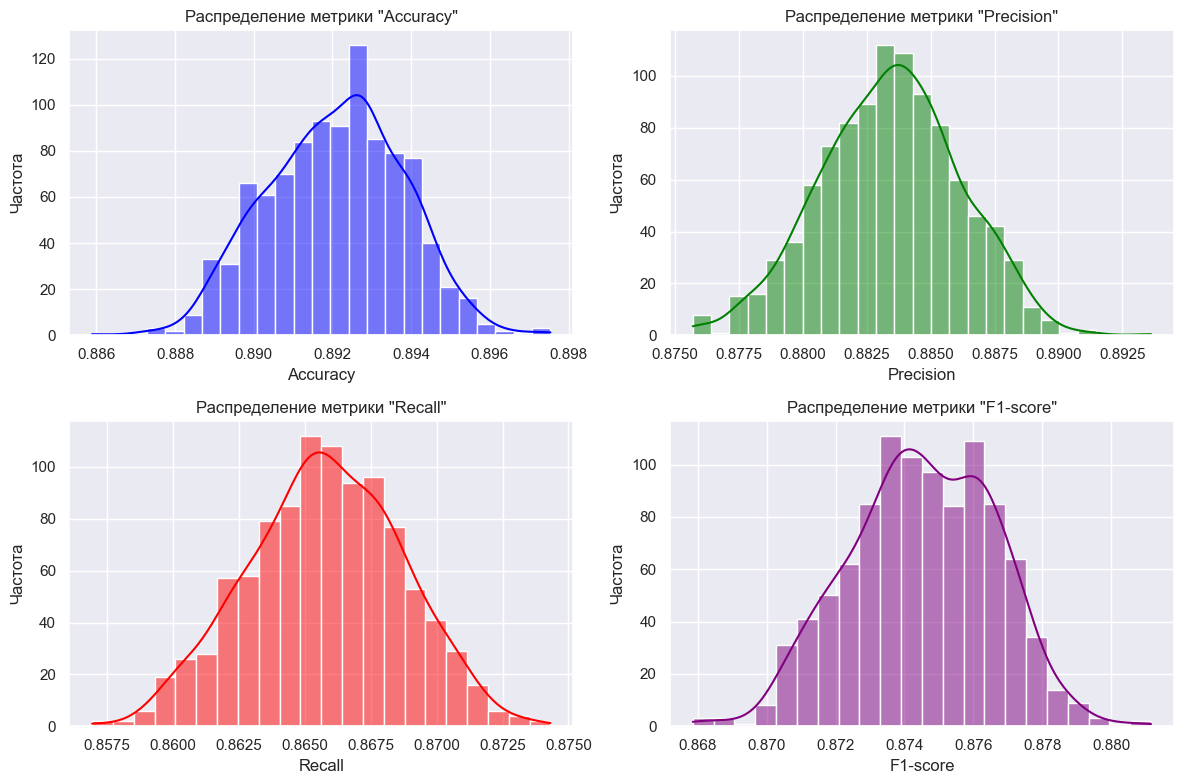

In [30]:
# Визуализация распределения метрик
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = [boot_accuracies, boot_precisions, boot_recalls, boot_f1_scores]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['blue', 'green', 'red', 'purple']

for i, (ax, metric, name, color) in enumerate(zip(
        axes.flat, metrics, metric_names, colors)):
    sns.histplot(metric, ax=ax, color=color, kde=True)
    ax.set_title(f'Распределение метрики "{name}"')
    ax.set_xlabel(name)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

### Интерпретация коэффициентов модели

In [31]:
# Получение коэффициентов и их значимости
coefficients = pd.DataFrame({
    'Признак': x_train.columns,
    'Коэффициент': model.coef_[0],
    'Exp(Коэффициент)': np.exp(model.coef_[0]),
    'Влияние на шансы': [
        'Увеличивает' if coef > 0 else 'Уменьшает' for coef in model.coef_[0]]
})

# Сортировка по абсолютному значению коэффициента
coefficients_sorted = coefficients.reindex(
    coefficients['Коэффициент'].abs().sort_values(ascending=False).index)

print('Коэффициенты модели (отсортированы по влиянию):')
display(coefficients_sorted.reset_index(drop=True))

Коэффициенты модели (отсортированы по влиянию):


,Признак,Коэффициент,Exp(Коэффициент),Влияние на шансы
0,Inflight wifi service_0,3.080902,21.778031,Увеличивает
1,Inflight wifi service_2,2.853221,17.343554,Увеличивает
2,Online boarding_0,-2.540987,0.078789,Уменьшает
3,Type of Travel_0,-1.773036,0.169817,Уменьшает
4,Customer Type_0,-1.313970,0.268751,Уменьшает
5,Inflight wifi service_1,1.236020,3.441886,Увеличивает
6,Inflight entertainment_2,-1.235898,0.290574,Уменьшает
7,Type of Travel_1,1.151735,3.163676,Увеличивает
8,Class_0,-0.985789,0.373145,Уменьшает
9,Online boarding_2,-0.942033,0.389835,Уменьшает


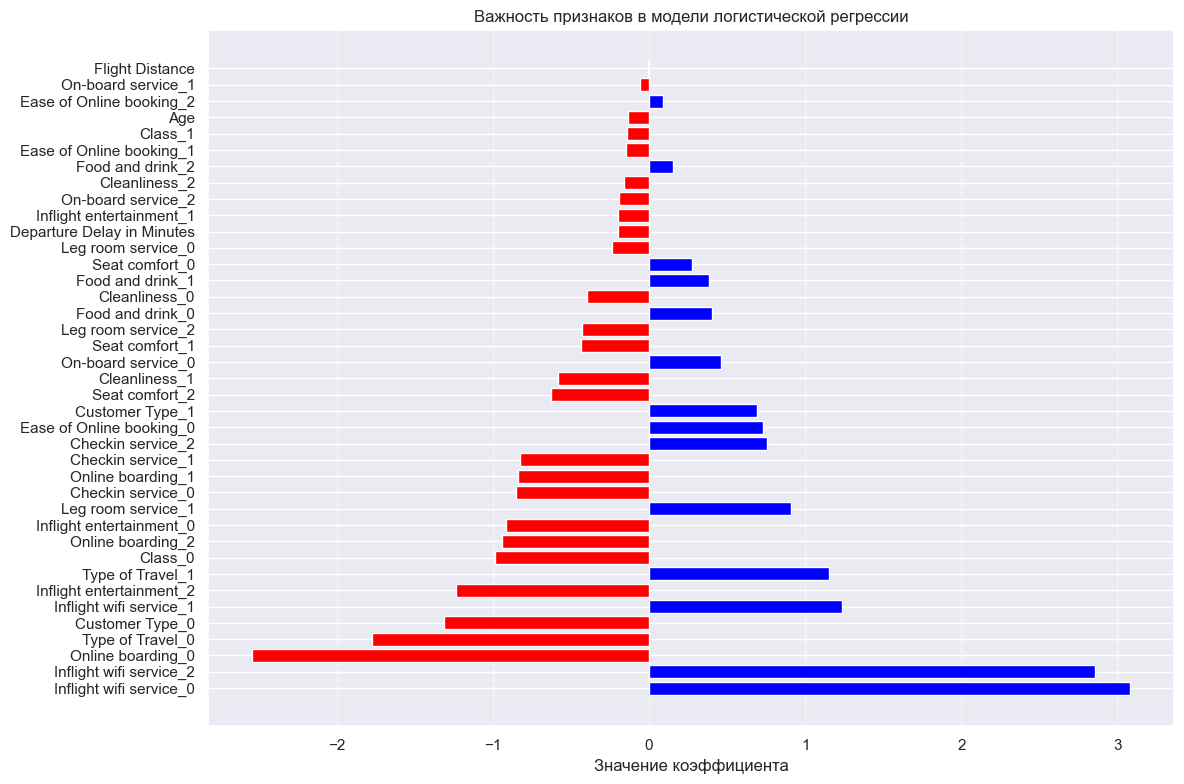

In [32]:
# Визуализация важности признаков
plt.figure(figsize=(12, 8))
colors = ['red' if coef < 0 else 'blue'
          for coef in coefficients_sorted['Коэффициент']]
plt.barh(coefficients_sorted['Признак'],
         coefficients_sorted['Коэффициент'], color=colors)
plt.xlabel('Значение коэффициента')
plt.title('Важность признаков в модели логистической регрессии')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Анализ коэффициентов логистической регрессии позволил выявить ключевые факторы влияния на удовлетворенность полетом. Наибольший позитивный вклад вносят высокие оценки качества услуги «Inflight wifi service», существенно повышающие вероятность положительной оценки. С другой стороны, основными негативными факторами выступают низкие оценки сервиса онлайн бронирования («Online boarding»). К наиболее значимым предикторам общего качества полета относятся удобство онлайн бронирования, качество бортового Wi-Fi и сопутствующих услуг. Кроме того, в ходе анализа была обнаружена устойчивая положительная корреляция между оценками различных сервисов, что свидетельствует о согласованном восприятии качества обслуживания пассажирами.